In [1]:
import pandas as pd
import pysurvival
from pysurvival.utils import load_model
from pysurvival.utils.display import create_risk_groups
import numpy as np
from cleaning import cleaning

import warnings
warnings.simplefilter('ignore')

from pysurvival.models.survival_forest import ExtraSurvivalTreesModel
import matplotlib.pyplot as plt

import lifelines
from preprocess_newdata import preprocess_newdata

In [2]:
estimator_loaded = load_model('trained_models/ExtraST_model.zip')

Loading the model from trained_models/ExtraST_model.zip


In [3]:
features = pd.read_csv("trained_models/Features_ExtraST_model.csv").iloc[:,1]

#features.drop(['missBIO2'])

In [10]:
X_train, X_test, y_train, y_test = cleaning('train.csv',0.2)

X_train = pd.concat([X_train,X_test])
y_train = pd.concat([y_train,y_test])

X_train = X_train[features]

In [11]:
X_train = pd.read_csv('data/train.csv')
X_train.fillna(0, inplace=True)
X_train['missBIO2'] = 0
X_train = X_train[features]

X_train = preprocess_newdata(X_train)

In [5]:
X_train.describe().iloc[:,0:10]

,cutaneous_biopsy_ulceration,scenario,cutaneous_biopsy_histological_subtype,cutaneous_biopsy_breslow,total_count_slnb_ldn,visceral_metastasis_location,total_positives_slnb_ldn,patient_hair_color,cutaneous_biopsy_lymphatic_invasion,patient_eye_color
count,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000,2148.000000
mean,0.222067,0.503073,0.433224,0.035646,0.054747,0.001392,0.016405,0.118699,0.027933,0.128051
std,0.415733,0.169209,0.131942,0.056080,0.111771,0.015833,0.058399,0.056959,0.164819,0.061903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.543581,0.276825,0.009792,0.000000,0.000000,0.000000,0.112530,0.000000,0.118337
50%,0.000000,0.543581,0.507489,0.018333,0.017544,0.000000,0.000000,0.140584,0.000000,0.160186
75%,0.000000,0.617242,0.507489,0.040000,0.052632,0.000000,0.000000,0.140584,0.000000,0.160186
max,1.000000,0.617242,0.573421,0.998333,1.000000,0.248502,1.000000,0.198539,1.000000,0.240237


In [6]:
risks = estimator_loaded.predict_risk(X_train)

risk_df = pd.DataFrame(risks,columns=['Risk'])
risk_df = np.log(risk_df)

In [7]:
risk_df.describe()

,Risk
count,2148.000000
mean,5.566057
std,0.112483
min,5.397047
25%,5.477788
50%,5.533896
75%,5.627460
max,5.954252


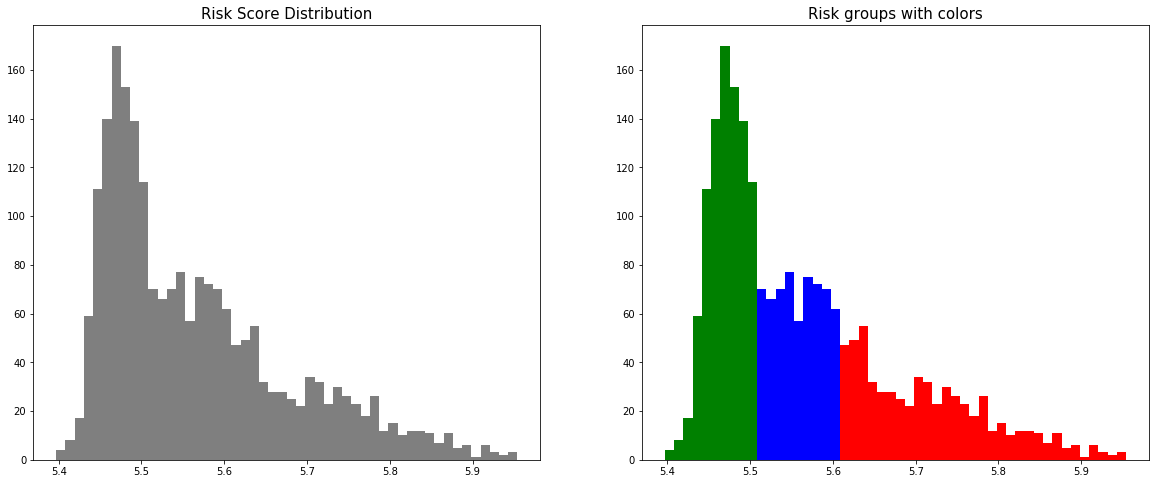

{'low': ('green',
  [0,
   2,
   3,
   4,
   8,
   9,
   11,
   14,
   16,
   19,
   20,
   22,
   24,
   27,
   29,
   31,
   32,
   33,
   38,
   39,
   45,
   48,
   49,
   50,
   51,
   52,
   56,
   61,
   63,
   64,
   67,
   68,
   74,
   75,
   76,
   78,
   79,
   81,
   82,
   84,
   86,
   88,
   92,
   95,
   97,
   98,
   102,
   103,
   104,
   105,
   107,
   108,
   109,
   110,
   113,
   114,
   115,
   116,
   117,
   121,
   122,
   128,
   130,
   131,
   137,
   140,
   142,
   144,
   145,
   147,
   148,
   149,
   151,
   152,
   153,
   155,
   157,
   158,
   159,
   160,
   162,
   166,
   168,
   169,
   170,
   171,
   173,
   175,
   176,
   178,
   185,
   186,
   189,
   192,
   193,
   195,
   196,
   197,
   198,
   199,
   203,
   208,
   209,
   211,
   213,
   214,
   215,
   216,
   217,
   222,
   223,
   228,
   229,
   233,
   236,
   239,
   241,
   246,
   247,
   250,
   252,
   253,
   254,
   256,
   257,
   258,
   259,
   261,
   264,
  

In [8]:
create_risk_groups(estimator_loaded, X_train, use_log = True, num_bins = 50,
    low={'lower_bound':0, 'upper_bound':5.5, 'color':'green'},
    medium={'lower_bound':5.5, 'upper_bound':5.6,'color':'blue'},
    high={'lower_bound':5.6, 'upper_bound':6.0,  'color':'red'})

In [12]:


#thres1 = [2.8,3.0,3.2,3.4,3.5]
#thres2 = [3.8,4.0,4.2,4.4,4.6,4.8, 5.0,5.2]
thres1 = [5.45,5.475,5.5,5.525,5.55,5.575,5.6]
thres2 = [5.55,5.6,5.65,5.7]

#thres1 = [10,15,20,25,30,35,40,45,50,60]
#thres2 = [25,30,35,40,45,50,55,60,65,70,75,80,90,100,110,120]


p_values = pd.DataFrame(np.array([[0,0,0,0,0,0]]), columns=['t1','t2', 'p1','p2','p3','p_mean'])
for t1 in thres1:
    for t2 in thres2:
        if t2>t1:
            g1 = risk_df[risk_df.Risk<t1]
            g2 = risk_df[(risk_df.Risk>=t1) & (risk_df.Risk<t2)]
            g3 = risk_df[risk_df.Risk>=t2]

            groups = np.zeros(risk_df.shape[0])
            groups[g1.index] = 1
            groups[g2.index] = 2
            groups[g3.index] = 3

            event_durations = y_train.months_survival.values
            event_observed= y_train.specific_death.values

            result = lifelines.statistics.pairwise_logrank_test(event_durations, groups, event_observed)
            p_vals = result.p_value

            aux = pd.DataFrame(np.array([[t1,t2,p_vals[0],p_vals[1],p_vals[2],np.mean(p_vals)]]), columns=['t1','t2', 'p1','p2','p3','p_mean'])
            p_values = pd.concat([p_values, aux], axis=0)

p_values.index= np.arange(0, p_values.shape[0])
p_values.drop(0, inplace=True)
p_values.sort_values(by=['p_mean'], ascending=False, inplace=True)

In [13]:
p_values.head(10)

,t1,t2,p1,p2,p3,p_mean
17,5.550,5.60,0.997082,0.941450,0.948388,0.962307
10,5.500,5.60,0.726143,0.819380,0.908870,0.818131
14,5.525,5.60,0.655147,0.819575,0.836043,0.770255
9,5.500,5.55,0.658593,0.823878,0.775576,0.752683
20,5.575,5.60,0.575903,0.855624,0.680223,0.703917
6,5.475,5.60,0.538567,0.746139,0.758390,0.681032
5,5.475,5.55,0.510657,0.712039,0.706213,0.642970
13,5.525,5.55,0.475570,0.822107,0.565902,0.621193
7,5.475,5.65,0.783881,0.342009,0.389526,0.505139
8,5.475,5.70,0.788530,0.248822,0.266535,0.434629


In [14]:
t1=5.5
t2=5.6#4.0

g1 = risk_df[risk_df.Risk<t1]
g2 = risk_df[(risk_df.Risk>=t1) & (risk_df.Risk<t2)]
g3 = risk_df[risk_df.Risk>=t2]

print(g1.shape)
print(g2.shape)
print(g3.shape)


(834, 1)
(652, 1)
(662, 1)


In [15]:
groups = np.zeros(risk_df.shape[0])
groups[g1.index] = 1
groups[g2.index] = 2
groups[g3.index] = 3

In [16]:
risk_norm = risk_df/np.max(risk_df)

In [17]:
risk_norm.describe()

,Risk
count,2148.000000
mean,0.934804
std,0.018891
min,0.906419
25%,0.919979
50%,0.929402
75%,0.945116
max,1.000000


In [18]:
t1_norm = t1/np.max(risk_df)[0]

In [19]:
t2_norm = t2/np.max(risk_df)[0]

max_val = np.max(risk_df)[0]

In [20]:
risk_df['group']=groups

In [22]:
risk_df.to_csv('risks.csv')

In [23]:
keep_thresholds = pd.DataFrame([[t1_norm,t2_norm,max_val]], columns=["Threshold1-2","Threshold2-3", "Normalization_max"] )
keep_thresholds.to_csv('thresholds.csv')

In [29]:
def get_probabilities(x_test, estimator):
    
    # Create an empty pandas dataframes with these times as the columns
    pred = estimator.predict_survival(x_test.values[0, :]).flatten()
    times = np.arange(pred.shape[0])
    pred_df = pd.DataFrame(columns = times )
    
    # Convert each row to a pandas series row (transpose) with the index as these x times and append it to the df
    for i in range(0,len(x_test)):
        pred = estimator.predict_survival(x_test.values[i, :])
        pred_df = pred_df.append(pd.DataFrame(pred)) 

    pred_df = pred_df.set_index(np.arange(pred_df.shape[0]))

    return pred_df,times

In [30]:
#  store the probability curves
predictions,times = get_probabilities(X_train, estimator_loaded)


In [21]:
X_train['group'] = groups

In [26]:
y_train[X_train.group==1].months_survival.describe()

count    834.000000
mean     113.119904
std       67.973620
min        0.000000
25%       57.000000
50%      105.000000
75%      167.000000
max      252.000000
Name: months_survival, dtype: float64

In [27]:
y_train[X_train.group==2].months_survival.describe()

count    652.000000
mean     102.185583
std       65.344632
min        0.000000
25%       52.750000
50%       87.000000
75%      144.000000
max      253.000000
Name: months_survival, dtype: float64

In [28]:
y_train[X_train.group==3].months_survival.describe()

count    662.000000
mean      69.125378
std       53.737759
min        0.000000
25%       27.000000
50%       54.000000
75%       99.750000
max      251.000000
Name: months_survival, dtype: float64

In [55]:
c1 = predictions[groups==1].mean()
c2 = predictions[groups==2].mean()
c3 = predictions[groups==3].mean()

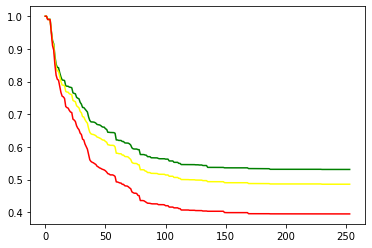

In [35]:
plt.plot(times, c1, '-', color='green')
plt.plot(times, c2, '-', color='yellow')
plt.plot(times, c3, '-', color='red')

In [49]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

762

In [83]:
mean_curves= pd.DataFrame(np.concatenate([c1,c2,c3]))

mean_curves.columns = ['curve']

mean_curves['time'] = np.concatenate([times,times,times])

mean_curves['group'] =  np.concatenate([np.repeat('Low',times.shape[0]),np.repeat('Medium',times.shape[0]),np.repeat('High',times.shape[0])])

mean_curves

,curve,time,group
0,1.000000,0,Low
1,1.000000,1,Low
2,0.991015,2,Low
3,0.990997,3,Low
4,0.990848,4,Low
...,...,...,...
757,0.395160,249,High
758,0.395160,250,High
759,0.395160,251,High
760,0.395160,252,High


In [87]:
#66c2a5
#8da0cb
#fc8c62

colorscale = alt.Scale(domain=['Low', 'Medium', 'High'],
                       range=['#66c2a5', '#8da0cb', '#fc8c62'])

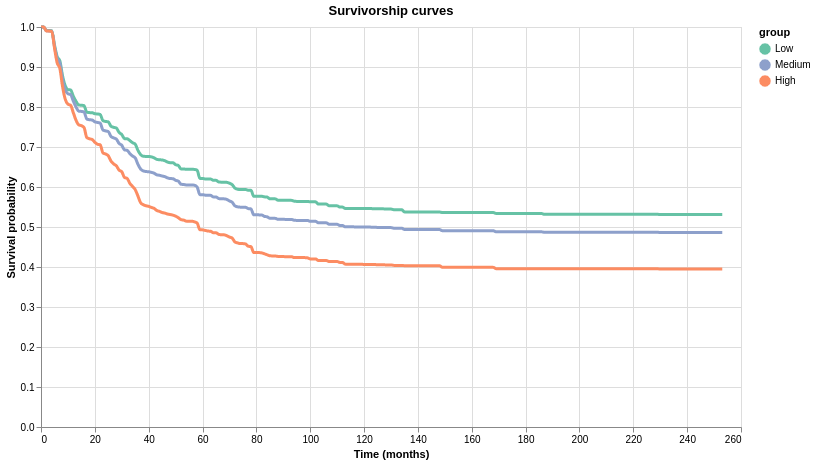

In [92]:
# select a point for which to provide details-on-demand
label = alt.selection_single(
    encodings=['x'], # limit selection to x-axis value
    on='mouseover',  # select on mouseover events
    nearest=True,    # select data point nearest the cursor
    empty='none'     # empty selection includes no data points
)

# define our base line chart of stock prices
base = alt.Chart().mark_line(
   # point=True,   
    strokeWidth=3,
    opacity=0.5,
    interpolate='monotone').encode(
    alt.X('time:Q'),
    alt.Y('curve:Q',scale=alt.Scale(domain=[0, 1])),
    alt.Color('group:N', scale=colorscale),
    opacity = alt.value(1)
)
base.encoding.x.title = 'Time (months)'
base.encoding.y.title = 'Survival probability'

chart = alt.layer(
    base, # base line chart
    
    # add a rule mark to serve as a guide line
    alt.Chart().mark_rule(color='#aaa').encode(
        x='time:Q'
    ).transform_filter(label),
    
    # add circle marks for selected time points, hide unselected points
    base.mark_circle().encode(
        opacity=alt.condition(label, alt.value(1), alt.value(0))
    ).add_selection(label),

    # add white stroked text to provide a legible background for labels
    base.mark_text(align='left', dx=5, dy=-5, stroke='white', strokeWidth=2).encode(
        text='curve:Q'
    ).transform_filter(label),

    # add text labels for stock prices
    base.mark_text(align='left', dx=5, dy=-5).encode(
        text='curve:Q'
    ).transform_filter(label),
    
    data=mean_curves
).properties(
    width=700,
    height=400,
    title = 'Survivorship curves'
)

chart

In [93]:
chart.save('chart.html')

In [97]:
c = pd.DataFrame([c1,c2,c3])
c.index=['group1', 'group2', 'group3']
c.to_csv('mean_curves.csv')